In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pycorrcat.pycorrcat import plot_corr, corr_matrix
from sklearn.linear_model import LogisticRegression #This is for logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score #Metrics for classification
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA,QDA
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [2]:
#import pip
#pip.main(["install","xgboost"])

In [3]:
#import pip
#pip.main(["install","pycorr"])

In [4]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Analysis 1\\aug_train.CSV")

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [6]:
df_new=df.drop("enrollee_id",axis=1) # Since enrolle_id is meaningless feature, it is removed from the dataframe 
df_new.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [7]:
df_new.duplicated().sum() # Are there any duplicated rows? 

49

In [8]:
df_new.drop_duplicates(inplace=True)
df_new.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [9]:
df_new.duplicated().sum()

0

In [10]:
len(df_new)

19109

In [11]:
x=df_new.iloc[:,:12] #upto the 12 without 12
y=df_new.iloc[:,12]

In [12]:
x.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
x_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17667,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,6,10000+,NaN,1,10
9788,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,1,55
8768,city_71,0.884,Male,Has relevent experience,no_enrollment,High School,NaN,19,<10,Pvt Ltd,2,7
15190,city_23,0.899,NaN,Has relevent experience,Part time course,Graduate,STEM,5,50-99,Public Sector,>4,46
7722,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,8,100-500,NaN,1,24



# Data Cleaning


In [16]:
x_train.isna().any() # Are there any missing values in each coloumn?

city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [17]:
y_train.isna().any()

False

In [18]:
x_train.isna().sum() # No of missing values in each coloumn

city                         0
city_development_index       0
gender                    3629
relevent_experience          0
enrolled_university        315
education_level            382
major_discipline          2274
experience                  53
company_size              4746
company_type              4912
last_new_job               350
training_hours               0
dtype: int64

## train to category

In [19]:
x_train.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [20]:
y_train.dtypes

dtype('int64')

In [21]:
x_train = x_train.astype({"city":'category',"gender":'category',"relevent_experience":'category',"enrolled_university":'category',"education_level":'category',"major_discipline":'category',"experience":'category',"company_size":'category',"company_type":'category',"last_new_job":'category'})

In [22]:
x_train.dtypes

city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
dtype: object

In [23]:
y_train = y_train.astype({"target":'category'})

In [24]:
y_train.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

## test to category

In [25]:
x_test.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [26]:
y_test.dtypes

dtype('int64')

In [27]:
x_test = x_test.astype({"city":'category',"gender":'category',"relevent_experience":'category',"enrolled_university":'category',"education_level":'category',"major_discipline":'category',"experience":'category',"company_size":'category',"company_type":'category',"last_new_job":'category'})

In [28]:
x_test.dtypes

city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
dtype: object

In [29]:
y_test = y_test.astype({"target":'category'})

In [30]:
y_test.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

## imputing missing values

In [31]:
# Since the missing values are only in the categorical variables, "MODE" will be used to impute the missing values

In [32]:
x_train['gender'].mode()

0    Male
Name: gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [33]:
x_train['gender'].fillna('Male',inplace=True)

In [34]:
x_test['gender'].fillna('Male',inplace=True)

In [35]:
x_train['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: category
Categories (3, object): ['Full time course', 'Part time course', 'no_enrollment']

In [36]:
x_train['enrolled_university'].fillna('no_enrollment',inplace=True)

In [37]:
x_test['enrolled_university'].fillna('no_enrollment',inplace=True)

In [38]:
x_train['education_level'].mode()

0    Graduate
Name: education_level, dtype: category
Categories (5, object): ['Graduate', 'High School', 'Masters', 'Phd', 'Primary School']

In [39]:
x_train['education_level'].fillna('Graduate',inplace=True)

In [40]:
x_test['education_level'].fillna('Graduate',inplace=True)

In [41]:
x_train['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: category
Categories (6, object): ['Arts', 'Business Degree', 'Humanities', 'No Major', 'Other', 'STEM']

In [42]:
x_train['major_discipline'].fillna('STEM',inplace=True)

In [43]:
x_test['major_discipline'].fillna('STEM',inplace=True)

In [44]:
x_train['experience'].mode()

0    >20
Name: experience, dtype: category
Categories (22, object): ['1', '10', '11', '12', ..., '8', '9', '<1', '>20']

In [45]:
x_train['experience'].fillna('>20',inplace=True)

In [46]:
x_test['experience'].fillna('>20',inplace=True)

In [47]:
x_train['company_size'].mode()

0    50-99
Name: company_size, dtype: category
Categories (8, object): ['100-500', '1000-4999', '10000+', '50-99', '500-999', '5000-9999', '<10', 'Oct-49']

In [48]:
x_train['company_size'].fillna('50-99',inplace=True)

In [49]:
x_test['company_size'].fillna('50-99',inplace=True)

In [50]:
x_train['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: category
Categories (6, object): ['Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd']

In [51]:
x_train['company_type'].fillna('Pvt Ltd',inplace=True)

In [52]:
x_test['company_type'].fillna('Pvt Ltd',inplace=True)

In [53]:
x_train['last_new_job'].mode()

0    1
Name: last_new_job, dtype: category
Categories (6, object): ['1', '2', '3', '4', '>4', 'never']

In [54]:
x_train['last_new_job'].fillna('1',inplace=True)

In [55]:
x_test['last_new_job'].fillna('1',inplace=True)

In [56]:
x_train.isna().any()

city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
dtype: bool

In [57]:
x_test.isna().any()

city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
dtype: bool

In [58]:
trainDataSet = pd.concat([x_train, y_train], axis=1)

In [59]:
trainDataSet.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17667,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,6,10000+,Pvt Ltd,1,10,0
9788,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,1,55,0
8768,city_71,0.884,Male,Has relevent experience,no_enrollment,High School,STEM,19,<10,Pvt Ltd,2,7,1
15190,city_23,0.899,Male,Has relevent experience,Part time course,Graduate,STEM,5,50-99,Public Sector,>4,46,0
7722,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,8,100-500,Pvt Ltd,1,24,0


In [60]:
testDataSet = pd.concat([x_test, y_test], axis=1)

In [61]:
testDataSet.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5759,city_103,0.920,Male,No relevent experience,no_enrollment,High School,STEM,3,50-99,Pvt Ltd,never,48,0
11495,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,<10,Pvt Ltd,never,20,0
2182,city_160,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,96,0
14006,city_75,0.939,Male,No relevent experience,no_enrollment,Masters,STEM,12,<10,Early Stage Startup,4,28,0
4042,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,100-500,Pvt Ltd,1,9,0


In [62]:
#trainDataSet.to_csv("trainDataSet.csv")

In [63]:
#testDataSet.to_csv("testDataSet.csv")

In [64]:
#x_train.to_csv("x_train.csv")

In [65]:
#y_train.to_csv("y_train.csv")

In [66]:
#x_test.to_csv("x_test.csv")

In [67]:
#y_test.to_csv("y_test.csv")

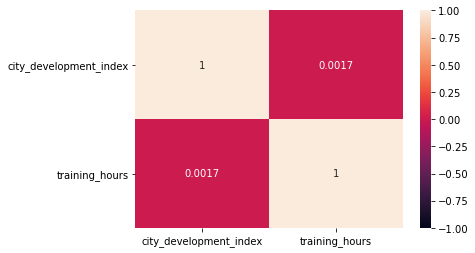

In [68]:
sns.heatmap(trainDataSet.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [69]:
trainDataSet.corr()

,city_development_index,training_hours
city_development_index,1.000000,0.001703
training_hours,0.001703,1.000000


In [70]:
#Correlation plot for continuous data is done by using R  

In [71]:
le=LabelEncoder()
le

LabelEncoder()

In [72]:
x_train[['city','gender','enrolled_university','relevent_experience','education_level','experience','major_discipline','company_type','company_size','last_new_job']]=x_train[['city','gender','enrolled_university','relevent_experience','education_level','experience','major_discipline','company_type','company_size','last_new_job']].apply(lambda col:le.fit_transform(col))

In [73]:
x_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
17667,64,0.624,1,0,2,2,5,16,2,5,0,10
9788,64,0.624,1,0,2,0,5,16,2,5,0,55
8768,99,0.884,1,0,2,1,5,10,6,5,1,7
15190,65,0.899,1,0,1,0,5,15,3,4,4,46
7722,30,0.897,1,0,2,2,5,18,0,5,0,24


In [74]:
x_test[['city','gender','enrolled_university','relevent_experience','education_level','experience','major_discipline','company_type','company_size','last_new_job']]=x_test[['city','gender','enrolled_university','relevent_experience','education_level','experience','major_discipline','company_type','company_size','last_new_job']].apply(lambda col:le.fit_transform(col))

In [75]:
x_test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
5759,5,0.920,1,1,2,1,5,13,3,5,5,48
11495,5,0.920,1,0,2,0,5,21,6,5,5,20
2182,43,0.920,1,0,2,2,5,21,3,5,4,96
14006,92,0.939,1,1,2,2,5,3,6,0,3,28
4042,5,0.920,1,0,2,0,5,19,0,5,0,9


In [76]:
x_train.city.value_counts()

5     3456
64    2158
48    1223
13    1056
49     670
      ... 
12       3
67       3
20       2
54       1
34       1
Name: city, Length: 123, dtype: int64

In [77]:
x_train.city.value_counts()

5     3456
64    2158
48    1223
13    1056
49     670
      ... 
12       3
67       3
20       2
54       1
34       1
Name: city, Length: 123, dtype: int64

In [78]:
x_train.gender.value_counts()

1    14137
0     1001
2      149
Name: gender, dtype: int64

In [79]:
x_train.gender.value_counts()

1    14137
0     1001
2      149
Name: gender, dtype: int64

In [80]:
x_train.enrolled_university.value_counts()

2    11280
0     3044
1      963
Name: enrolled_university, dtype: int64

In [81]:
x_train.enrolled_university.value_counts()

2    11280
0     3044
1      963
Name: enrolled_university, dtype: int64

In [82]:
x_train.relevent_experience.value_counts()

0    10997
1     4290
Name: relevent_experience, dtype: int64

In [83]:
x_train.relevent_experience.value_counts()

0    10997
1     4290
Name: relevent_experience, dtype: int64

In [84]:
x_train.education_level.value_counts()

0    9585
2    3489
1    1626
3     337
4     250
Name: education_level, dtype: int64

In [85]:
x_train.education_level.value_counts()

0    9585
2    3489
1    1626
3     337
4     250
Name: education_level, dtype: int64

In [86]:
x_train.experience.value_counts()

21    2641
15    1127
14    1113
13    1099
16     970
11     889
17     821
1      804
19     780
18     664
6      545
2      531
5      464
0      433
20     425
3      406
7      400
4      310
8      271
10     246
9      225
12     123
Name: experience, dtype: int64

In [87]:
x_train.experience.value_counts()

21    2641
15    1127
14    1113
13    1099
16     970
11     889
17     821
1      804
19     780
18     664
6      545
2      531
5      464
0      433
20     425
3      406
7      400
4      310
8      271
10     246
9      225
12     123
Name: experience, dtype: int64

In [88]:
x_train.major_discipline.value_counts()

5    13805
2      547
4      299
1      258
0      203
3      175
Name: major_discipline, dtype: int64

In [89]:
x_train.major_discipline.value_counts()

5    13805
2      547
4      299
1      258
0      203
3      175
Name: major_discipline, dtype: int64

In [90]:
x_train.company_type.value_counts()

5    12700
1      807
4      781
0      486
2      415
3       98
Name: company_type, dtype: int64

In [91]:
x_train.company_type.value_counts()

5    12700
1      807
4      781
0      486
2      415
3       98
Name: company_type, dtype: int64

In [92]:
x_train.company_size.value_counts()

3    7199
0    2082
2    1608
7    1152
1    1072
6    1016
4     705
5     453
Name: company_size, dtype: int64

In [93]:
x_train.company_size.value_counts()

3    7199
0    2082
2    1608
7    1152
1    1072
6    1016
4     705
5     453
Name: company_size, dtype: int64

In [94]:
x_train.last_new_job.value_counts()

0    6793
4    2605
1    2293
5    1964
3     823
2     809
Name: last_new_job, dtype: int64

In [95]:
x_train.last_new_job.value_counts()

0    6793
4    2605
1    2293
5    1964
3     823
2     809
Name: last_new_job, dtype: int64

In [96]:
#x_train_new=pd.get_dummies(x_train[['city','gender','enrolled_university','relevent_experience','education_level','experience',
#                             'major_discipline','company_type','company_size','last_new_job']],drop_first=True)
#x_train_new.head()

In [97]:
#x_test_new=pd.get_dummies(x_test[['city','gender','enrolled_university','relevent_experience','education_level','experience',
#                              'major_discipline','company_type','company_size','last_new_job']],drop_first=True)
#x_test_new.head()

In [98]:
# Get missing columns in the training test
#missing_cols = set( x_train_new.columns ) - set( x_test_new.columns )

In [99]:
#missing_cols

In [100]:
#x_test_new= x_test_new.reindex(columns = x_train_new.columns, fill_value=0)

In [101]:
#missing_cols = set( x_train_new.columns ) - set( x_test_new.columns )
#missing_cols

In [102]:
x_train.shape

(15287, 12)

In [103]:
x_test.shape

(3822, 12)

In [104]:
y_train.value_counts()

0    11483
1     3804
Name: target, dtype: int64

# Performing SMOTE

In [ ]:
smt=SMOTE()

In [ ]:
x_sm,y_sm=smt.fit_resample(x_train_new,y_train)

In [ ]:
y_sm.value_counts()

# Over sampling (SMOTE)

## 1) Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=100,penalty='l2',solver='newton-cg')
lr.fit(x_sm,y_sm)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_sm, y_sm)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.1)
rr.fit(x_sm, y_sm)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(x_sm, y_sm)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(max_features= 'log2', n_estimators= 100)
rf.fit(x_sm, y_sm)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')
knn.fit(x_sm, y_sm)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 50, gamma='scale', kernel= 'poly')
SVM.fit(x_sm, y_sm)

## 7)GradientBoosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.5)
gradrg.fit(x_sm, y_sm)

## 9)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_sm, y_sm)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Random Forest
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)

In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# Without re-sampling (SMOTE)

## 1) Logistic

In [ ]:
lr = LogisticRegression(C=100,penalty='l2',solver='newton-cg')
lr.fit(x_train_new,y_train)

## 2) Ridge

In [ ]:
rr = RidgeClassifier(alpha=0.7)
rr.fit(x_train_new,y_train)

## 3)Bagging

In [ ]:
bag = BaggingClassifier()
bag.fit(x_train_new,y_train)

## 4)Rndom Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(x_train_new,y_train)

## 5)KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_new,y_train)

## 6)SVM

In [ ]:
SVM = svm.LinearSVC()
SVM.fit(x_train_new,y_train)

## 7)Gradient Boosting

In [ ]:
gradrg=GradientBoostingClassifier()
gradrg.fit(x_train_new,y_train)

## 8)LDA

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_new,y_train)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)


In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# -----------------------------------------------------------------------------------------------------------

# Random Under Sampling

In [106]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
x_rus, y_rus = rus.fit_resample(x_train,y_train)

## 1)Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=10,penalty='l2',solver='newton-cg',random_state=1)
lr.fit(x_rus,y_rus)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_rus,y_rus)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.6,random_state=1)
rr.fit(x_rus, y_rus)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus,y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators = 100,random_state=1)
bag.fit(x_rus, y_rus)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'log2',random_state=1)
rf.fit(x_rus, y_rus)

In [ ]:
pred_Y_rf = rf.predict(x_test_new)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, pred_Y_rf)
a=auc(fpr,tpr)
print("Area under the curve:",a)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_matrixrf = confusion_matrix(y_test, pred_Y_rf)
print(confusion_matrixrf)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 4, weights = 'uniform')
knn.fit(x_rus, y_rus)

In [ ]:
pred_Y_knn = knn.predict(x_test_new)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_Y_knn)
a=auc(fpr,tpr)
print("Area under the curve:",a)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_matrixknn = confusion_matrix(y_test, pred_Y_knn)
print(confusion_matrixknn)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [107]:
SVM = SVC(C= 1.0, gamma='scale', kernel= 'rbf',random_state=1)
SVM.probability=True
SVM.fit(x_rus, y_rus)

SVC(probability=True, random_state=1)

### saving the model

In [108]:
import pickle

In [ ]:
#C:\\Users\\User\\Desktop\\Data Analysis 2\\

In [109]:
filename = "C:\\Users\\User\\Desktop\\Data Analysis 2\\finalized_model.ipynb"
pickle.dump(SVM, open(filename, 'wb'))

### loading the model

In [110]:
loaded_model=pickle.load(open(filename, 'rb'))

In [111]:
loaded_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [112]:
loaded_model.predict_proba(x_test)

array([[0.59912396, 0.40087604],
       [0.59744204, 0.40255796],
       [0.47098167, 0.52901833],
       ...,
       [0.52185368, 0.47814632],
       [0.60552156, 0.39447844],
       [0.43310295, 0.56689705]])

## 7)GradientBoosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100, subsample = 0.5,random_state=1)
gradrg.fit(x_rus, y_rus)

## 8)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_rus,y_rus)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)


In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# -----------------------------------------------------------------------------------------------------------

# SMOTE + Under sampling

In [ ]:
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.6, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_smun, y_smun = pipeline.fit_resample(x_train_new,y_train)

## 1)Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=10,penalty='l2',solver='liblinear')
lr.fit(x_smun, y_smun)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_smun, y_smun)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.1)
rr.fit(x_smun, y_smun)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators = 100)
bag.fit(x_smun, y_smun)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'log2')
rf.fit(x_smun, y_smun)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 4, weights = 'uniform')
knn.fit(x_smun, y_smun)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 1.0, gamma='scale', kernel= 'rbf')
SVM.fit(x_smun, y_smun)

## 7)Gradient Boosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.5)
gradrg.fit(x_smun, y_smun)

## 8)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_smun, y_smun)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)

In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf